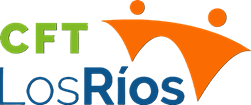
# Taller de Analítica
### Clase 3: Algoritmos de Predicción con GridSearchCV
#### Profesor: Diego Miranda Olavarría
#### Data Scientist

### En esta clase veremos distintos algoritmos de Machine Learning utilizando la libreria GridSearchCV, que permite establecer la busqueda de parametros con el objetivo de mejorar las metricas y el rendimiento de los modelos de prediccion

In [1]:
import pandas as pd 
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('Boston.csv')

data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
X = data.drop('medv', axis=1)
y = data['medv']

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Arbol de Decision

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Definición del modelo y parámetros para Grid Search
dt_reg = DecisionTreeRegressor()
params_dt_reg = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search
grid_dt_reg = GridSearchCV(dt_reg, params_dt_reg, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_dt_reg.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

## Random Forest

In [6]:
from sklearn.ensemble import RandomForestRegressor

# Definición del modelo y parámetros para Grid Search
rf_reg = RandomForestRegressor()
params_rf_reg = {
    'n_estimators': [50, 150, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Grid Search
grid_rf_reg = GridSearchCV(rf_reg, params_rf_reg, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf_reg.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 150, 200]},
             scoring='neg_mean_squared_error')

## XGBoost

In [7]:
import xgboost as xgb

# Definición del modelo y parámetros para Grid Search
xgboost_reg = xgb.XGBRegressor()
params_xgb_reg = {
    'n_estimators': [5, 10],
    'max_depth': [2, 4, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.5, 0.75, 1.0],
    'colsample_bytree': [0.5, 1.0],
    'gamma': [0, 0.1]
}

# Grid Search
grid_xgb_reg = GridSearchCV(xgboost_reg, params_xgb_reg, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_xgb_reg.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1.0], 'gamma': [0, 0.1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [2, 4, 6],
                         'n_estimators': [5, 10],
                         'subsample': [0.5, 0.75, 1.0]},
             scoring='neg_mean_squared_error')

## Perceptrón Multicapa

In [8]:
from sklearn.neural_network import MLPRegressor

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

mlp_reg = MLPRegressor(max_iter=500)
params_mlp_reg = {
    'hidden_layer_sizes': [(100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01],
}


grid_mlp_reg = GridSearchCV(mlp_reg, params_mlp_reg, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_mlp_reg.fit(X_train_scaled, y_train) 


C:\Users\Diego\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Diego\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Diego\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Diego\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 752, in fit
 

GridSearchCV(cv=3, estimator=MLPRegressor(max_iter=500), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(100,), (50, 50)],
                         'learning_rate_init': [0.001, 0.01],
                         'solver': ['adam', 'sgd']},
             scoring='neg_mean_squared_error')

## Support Vector Machine

In [9]:
from sklearn.svm import SVR

# Definición del modelo y parámetros para Grid Search
svr_reg = SVR()
params_svr_reg = {
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'C': [0.1, 1],
    'epsilon': [0.01, 0.1]
}

# Grid Search
grid_svr_reg = GridSearchCV(svr_reg, params_svr_reg, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_svr_reg.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1], 'epsilon': [0.01, 0.1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

## KNN

In [10]:
from sklearn.neighbors import KNeighborsRegressor

# Definición del modelo y parámetros para Grid Search
knn_reg = KNeighborsRegressor()
params_knn_reg = {
    'n_neighbors': range(1, 3),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [2, 5, 7],
    'p': [1, 2]
}

# Grid Search
grid_knn_reg = GridSearchCV(knn_reg, params_knn_reg, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)
grid_knn_reg.fit(X_train, y_train)


GridSearchCV(cv=2, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [2, 5, 7], 'n_neighbors': range(1, 3),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

## ElasticNet

In [11]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Definición del modelo y parámetros para Grid Search
elastic_net_reg = ElasticNet()
params_elastic_net = {
    'alpha': [0.1, 1, 10, 100],  # Combina la importancia de los términos de regularización L1 y L2
    'l1_ratio': [0.1, 0.5, 0.9],  # Mezcla entre la regresión Lasso y Ridge (0 = Ridge, 1 = Lasso)
    'max_iter': [100, 500],  # Número máximo de iteraciones
    'tol': [0.0001, 0.001]  # Tolerancia para el criterio de parada
}

# Grid Search
grid_elastic_net_reg = GridSearchCV(elastic_net_reg, params_elastic_net, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_elastic_net_reg.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.5, 0.9], 'max_iter': [100, 500],
                         'tol': [0.0001, 0.001]},
             scoring='neg_mean_squared_error')

## Gradient Boosting

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Definición del modelo y parámetros para Grid Search
gb_reg = GradientBoostingRegressor()
params_gb = {
    'n_estimators': [5, 10, 15],  # Número de etapas de refuerzo a realizar
    'learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    'max_depth': [3, 4, 5],  # Profundidad máxima de los estimadores de regresión
    'min_samples_split': [2, 4],  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2],  # Número mínimo de muestras requeridas en un nodo hoja
    'max_features': ['sqrt', 'log2', None]  # Número de características a considerar al buscar la mejor división
}

# Grid Search
grid_gb_reg = GridSearchCV(gb_reg, params_gb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_gb_reg.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [5, 10, 15]},
             scoring='neg_mean_squared_error')

## Lasso y Lars

In [13]:
from sklearn.linear_model import LassoLars
from sklearn.model_selection import GridSearchCV

# Definición del modelo y parámetros para Grid Search
lasso_lars = LassoLars()
params_lasso_lars = {
    'alpha': [0.01, 0.1, 1, 10],  # Parámetro de penalización
    'max_iter': [10, 50, 100],  # Número máximo de iteraciones
    'eps': [1e-4, 1e-8, 1e-12]  # Épsilon para el criterio de convergencia
}

# Grid Search sin el parámetro 'normalize'
grid_lasso_lars = GridSearchCV(lasso_lars, params_lasso_lars, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_lasso_lars.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LassoLars(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10],
                         'eps': [0.0001, 1e-08, 1e-12],
                         'max_iter': [10, 50, 100]},
             scoring='neg_mean_squared_error')

## Cat Boost

In [14]:
#!pip install catboost

In [15]:
from catboost import CatBoostRegressor

# Definición del modelo y parámetros para Grid Search
catboost_reg = CatBoostRegressor(silent=True)
params_catboost = {
    'iterations': [2, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [2, 4, 6],
    'l2_leaf_reg': [1, 3, 5],
    'loss_function': ['RMSE', 'MAE']
}

# Grid Search
grid_catboost_reg = GridSearchCV(catboost_reg, params_catboost, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)
grid_catboost_reg.fit(X_train, y_train)


GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x000002B0A3A33950>,
             n_jobs=-1,
             param_grid={'depth': [2, 4, 6], 'iterations': [2, 5, 10],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'loss_function': ['RMSE', 'MAE']},
             scoring='neg_mean_squared_error')

## LightGBM

In [16]:
#!pip install lightgbm

In [17]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Definición del modelo y parámetros para Grid Search
lgbm_reg = lgb.LGBMRegressor()
params_lgbm = {
    'num_leaves': [31, 62, 127],  # Número de hojas en un árbol
    'learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    'n_estimators': [5, 10, 15],  # Número de árboles a construir
    'max_depth': [-1, 5, 10],  # Profundidad máxima de los árboles, -1 significa sin límite
    'min_split_gain': [0.0, 0.1],  # Ganancia mínima para realizar una división
    'subsample': [0.8, 1.0],  # Submuestreo de los datos para construir los árboles
    'colsample_bytree': [0.8, 1.0]  # Submuestreo de características para construir cada árbol
}

# Grid Search
grid_lgbm_reg = GridSearchCV(lgbm_reg, params_lgbm, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_lgbm_reg.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1030
[LightGBM] [Info] Number of data points in the train set: 404, number of used features: 13
[LightGBM] [Info] Start training from score 22.796535
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [-1, 5, 10], 'min_split_gain': [0.0, 0.1],
                         'n_estimators': [5, 10, 15],
                         'num_leaves': [31, 62, 127], 'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error')

## Comparacion de Metricas

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate

# Supongamos que tienes un diccionario de modelos entrenados
# donde las claves son los nombres de los modelos y los valores son los modelos ya entrenados
models = {
    'DecisionTree': grid_dt_reg.best_estimator_,
    'RandomForest': grid_rf_reg.best_estimator_,
    'XGBoost': grid_xgb_reg.best_estimator_,
    'MLPRegressor': grid_mlp_reg.best_estimator_,
    'SVR': grid_svr_reg.best_estimator_,
    'KNeighbors': grid_knn_reg.best_estimator_,
    'ElasticNet': grid_elastic_net_reg.best_estimator_,
    'GradientBoosting': grid_gb_reg.best_estimator_,
    'CatBoost': grid_catboost_reg.best_estimator_,
    'LightGBM': grid_lgbm_reg.best_estimator_,

}

# Calcula MSE y R^2 para cada modelo
results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append([name, mse, r2])

# Mostrar los resultados en una tabla usando tabulate
print(tabulate(results, headers=['Modelo', 'MSE', 'R^2']))


Modelo                  MSE        R^2
----------------  ---------  ---------
DecisionTree       10.447     0.857542
RandomForest        9.23552   0.874062
XGBoost            20.4192    0.721558
MLPRegressor      618.735    -7.43724
SVR                29.4357    0.598606
KNeighbors         20.5378    0.719941
ElasticNet         24.042     0.672157
GradientBoosting   13.0956    0.821425
CatBoost           15.2861    0.791554
LightGBM           11.4809    0.843444


C:\Users\Diego\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
